# Eigenfaces, PCA, SVD & Principal Components

## 1. Eigenfaces 在做什么

把每张人脸图像拉平成一个向量 $x\in\mathbb{R}^d$（$d=$ 像素数）。一堆人脸样本 $\{x_i\}_{i=1}^n$ 构成“人脸点云”。

**Eigenfaces = PCA 学到的一组方向（基）**：

- 第 1 个方向：让人脸投影后“变化最大”（方差最大）的方向（最能区分人脸差异的变化模式）。
- 后续方向：在与前面方向正交的条件下，继续最大化方差。

所以它会产生一些“像脸但又不是具体某个人”的基底图像——这些就是 eigenfaces。


## 2. PCA 的目标：为什么要“投影后方差最大”

我们希望找一个单位向量 $w$（一条方向），把数据投影到一维：

$$
z = w^\top \tilde{x}
$$

其中 $\tilde{x}=x-\mu$ 是**去均值**后的数据（$\mu=\frac1n\sum_i x_i$）。

PCA 的第一主成分定义为：

$$
\max_{\|w\|_2=1}\ \mathrm{Var}(w^\top \tilde{x})
$$

原因直觉：投影后的方差越大，说明这个方向上数据“拉得越开”，信息量越大；用少量维度表示时，优先保留这种“变化最大”的方向，就能**压缩得更好、重构误差更小**（后面会用 SVD 说明它等价于最佳低秩逼近）。


## 3. 数学推导：为什么 $\mathrm{Var}(w^\top \tilde{x}) = w^\top C w$

令随机变量（或把样本视作均匀取样的经验分布）：

- $\tilde{x}$ 已经去均值，所以 $\mathbb{E}[\tilde{x}]=0$
- 协方差矩阵：

$$
C = \mathbb{E}[\tilde{x}\tilde{x}^\top]
$$

对标量 $z = w^\top \tilde{x}$：

$$
\mathrm{Var}(z)=\mathbb{E}[z^2]-\big(\mathbb{E}[z]\big)^2
$$

因为

$$
\mathbb{E}[z]=\mathbb{E}[w^\top \tilde{x}]=w^\top\mathbb{E}[\tilde{x}]=0,
$$

所以

$$
\mathrm{Var}(w^\top \tilde{x})=\mathbb{E}[(w^\top \tilde{x})^2].
$$

展开：

$$
(w^\top \tilde{x})^2 = w^\top \tilde{x}\tilde{x}^\top w.
$$

取期望：

$$
\mathbb{E}[w^\top \tilde{x}\tilde{x}^\top w]
= w^\top \mathbb{E}[\tilde{x}\tilde{x}^\top] w
= w^\top C w.
$$

最后：
$$\mathrm{Var}(w^\top \tilde{x}) = w^\top C w$$


## 4. 得到“特征向量”（principal component）

第一主成分：

$$
\max_{\|w\|_2=1} w^\top C w
$$

这是经典 **Rayleigh quotient** 最大化。用拉格朗日乘子：

$$
\mathcal{L}(w,\lambda)=w^\top C w - \lambda (w^\top w - 1).
$$

对 $w$ 求导并令为 0：

$$
\nabla_w \mathcal{L}=2Cw-2\lambda w=0
\Rightarrow Cw=\lambda w.
$$

所以最优 $w$ 必须是协方差矩阵 $C$ 的特征向量；并且最大值对应最大的特征值 $\lambda_1$。

**后续主成分**再加上正交约束 $w_k^\top w_j=0\ (j<k)$，解就是 $C$ 的前 $k$ 个特征向量（按特征值从大到小）。 下面一节就重点讨论如何找到：1）协方差矩阵，2）前k个特征值



## 5. PCA 与 SVD 的关系（为什么它“解释” principal component）

把所有去均值样本堆成矩阵（约定俗成：行是样本，列是feature）：

$$
X_c\in\mathbb{R}^{n\times d}.
$$

经验协方差（常用 $1/(n-1)$）：

$$
C = \frac{1}{n-1}X_c^\top X_c.
$$

对 $X_c$ 做 SVD：

$$
X_c = U\Sigma V^\top.
$$

则：

$$
X_c^\top X_c = V\Sigma^2 V^\top
\Rightarrow
C = V\left(\frac{\Sigma^2}{n-1}\right)V^\top.
$$
这时已经是特征分解的形式，因此 $V$ 的列就是特征向量（主方向），$\Sigma^2/(n-1)$ 的对角元就是特征值（解释方差）。

所以：
- **PCA 的主方向** = $V$ 的列向量（右奇异向量）
- **解释方差（特征值）** = $\sigma_i^2/(n-1)$
- **解释方差比例**：

$$
\mathrm{EVR}_i=\frac{\sigma_i^2}{\sum_j \sigma_j^2}.
$$

并且 SVD 截断（取前 $k$ 个奇异值）给出**最佳 rank-$k$ 近似**（Eckart–Young 定理）：

$$
X_c \approx U_k\Sigma_k V_k^\top.
$$

这等价于：用前 $k$ 个主成分重构时，**重构误差最小**；也等价于：**保留方差最大**。

这就是 PCA 为什么“解释” principal components：它们既是最大方差方向，也是最佳低秩近似的基。


## 6. Eigenfaces = PCA 在人脸数据上的实例化

流程：

1. 向量化人脸图像，得到 $X\in\mathbb{R}^{n\times d}$  
2. 去均值：$X_c=X-\mathbf{1}\mu^\top$  
3. SVD：$X_c=U\Sigma V^\top$  
4. **Eigenfaces**：$V$ 的前几列 reshape 成图像 。这一列的每个元素是该主成分中对应像素的权重，表示这个主成分如何由原始像素线性组合而成
5. 某张脸的低维表示（系数）：

$$
\alpha = (x-\mu)^\top V_k
$$
某张脸的低维系数是将它的去均值向量投影到这些基上

6. 用 $k$ 个 eigenfaces 重构：

$$
\hat{x} = \mu + V_k\alpha^\top.
$$


## 7. Python

In [2]:
import numpy as np

def pca_svd(X, k=None, ddof=1):
    """
    X: [n_samples, n_features]
    k: number of components
    ddof: 1 -> use (n-1) in covariance, 0 -> use n
    """
    X = np.asarray(X, dtype=np.float64)
    n, d = X.shape

    mu = X.mean(axis=0, keepdims=True)
    Xc = X - mu

    # full SVD
    U, S, Vt = np.linalg.svd(Xc, full_matrices=False)  # Xc = U diag(S) Vt
    V = Vt.T  # columns are principal directions

    if k is None:
        k = V.shape[1]

    Vk = V[:, :k]
    Sk = S[:k]

    # explained variance (eigenvalues of covariance)
    denom = (n - ddof)
    explained_var = (S**2) / denom              # length r
    explained_var_ratio = explained_var / explained_var.sum()

    return {
        "mean": mu.reshape(-1),
        "components": Vk,                        # [d, k]
        "singular_values": Sk,                   # [k]
        "explained_var": explained_var[:k],      # [k]
        "explained_var_ratio": explained_var_ratio[:k],
        "U": U[:, :k],
        "S": Sk,
        "Vt": Vt[:k, :],
    }

def pca_transform(X, mean, components):
    Xc = X - mean
    return Xc @ components  # [n, k]

def pca_inverse_transform(Z, mean, components):
    return Z @ components.T + mean  # [n, d]

Explained variance ratio: [0.97489631 0.02510369]


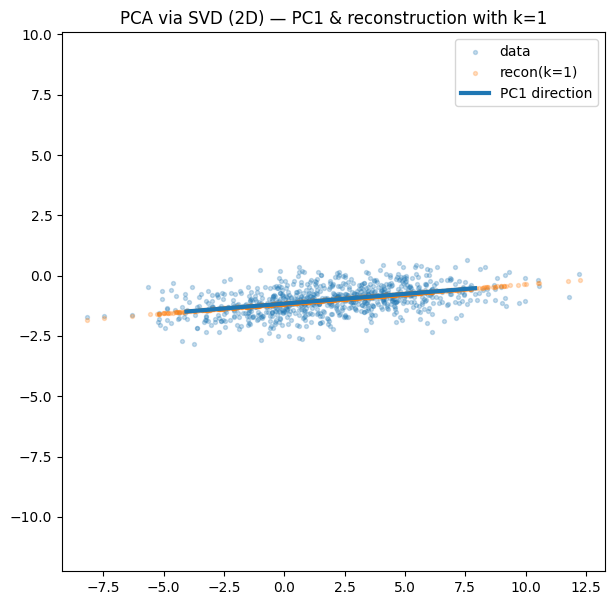

In [4]:
import matplotlib.pyplot as plt
np.random.seed(0)

# 生成一个拉长的椭圆分布（主方向明显）
n = 800
A = np.array([[3.0, 1.5],
              [0.0, 0.6]])      # 线性变换制造相关性
Z0 = np.random.randn(n, 2)
X = Z0 @ A.T + np.array([2.0, -1.0])  # 加偏移

# PCA
res = pca_svd(X, k=2, ddof=1)
mu = res["mean"]
V = res["components"]   # [2,2]
evr = res["explained_var_ratio"]

print("Explained variance ratio:", evr)

# 用 k=1 降维 + 重构（看压缩效果）
V1 = V[:, :1]
X1 = pca_transform(X, mu, V1)             # [n,1]
X_hat = pca_inverse_transform(X1, mu, V1) # [n,2]

# 主方向（第一主成分向量）
pc1 = V1[:, 0]
pc1_line = np.stack([mu - 6*pc1, mu + 6*pc1], axis=0)

plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], s=8, alpha=0.25, label="data")
plt.scatter(X_hat[:,0], X_hat[:,1], s=8, alpha=0.25, label="recon(k=1)")
plt.plot(pc1_line[:,0], pc1_line[:,1], linewidth=3, label="PC1 direction")
plt.axis("equal")
plt.legend()
plt.title("PCA via SVD (2D) — PC1 & reconstruction with k=1")
plt.show()

In [16]:
!pip install scikit-learn
!pip install imageio

Loaded 400 images of shape (112, 92), data matrix shape: (400, 10304)
result:  (10304,), components: (10304, 20)
Explained variance ratio (first 10):
[0.17799579 0.1290594  0.06930636 0.05595734 0.05140085 0.0330024
 0.02470679 0.0230361  0.01943259 0.0176388 ]
Cumulative EVR (k=20): 0.7015963385000357


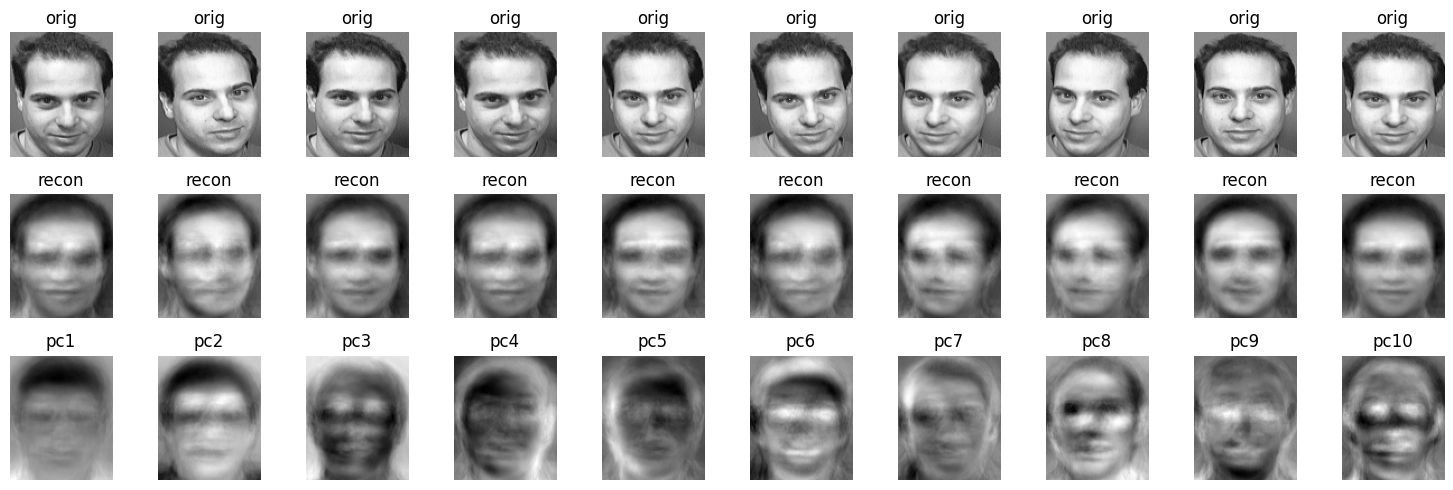

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

# https://www.cl.cam.ac.uk/research/dtg/attarchive/pub/data/ download att_faces

from pathlib import Path
face_folder = os.path.join(os.getcwd(), "orl_faces")
files = sorted(Path(face_folder).glob("**/*.pgm"))
images = np.stack([imageio.imread(f) for f in files]) 
X = images.reshape(len(images), -1).astype(np.float32)
print(f"Loaded {X.shape[0]} images of shape {images[0].shape}, data matrix shape: {X.shape}")
original_shape = images[0].shape

k = 20
training_size = X.shape[0] - 10
test_size = 10
# train PCA on all but last 10 images
res = pca_svd(X[:training_size], k=k, ddof=1)
mu = res["mean"]
Vk = res["components"]
print(f"result:  {res['mean'].shape}, components: {res['components'].shape}")


# eigenfaces: reshape principal directions to image shape
eigenfaces = Vk.T.reshape(-1, original_shape[0], original_shape[1])

# project + reconstruct last 10 faces
Z = pca_transform(X[-test_size:], mu, Vk)
X_hat = pca_inverse_transform(Z, mu, Vk)
recon = X_hat.reshape(-1, original_shape[0], original_shape[1])

print("Explained variance ratio (first 10):")
print(res["explained_var_ratio"][:10])
print(f"Cumulative EVR (k={k}):", res["explained_var_ratio"].sum())

# visualize
fig, axes = plt.subplots(3, 10, figsize=(15, 5))
test_images = X[-test_size:].reshape(-1, original_shape[0], original_shape[1])
for i in range(10):
    axes[0, i].imshow(test_images[i], cmap="gray")
    axes[0, i].axis("off")
    axes[0, i].set_title("orig")

    axes[1, i].imshow(recon[i], cmap="gray")
    axes[1, i].axis("off")
    axes[1, i].set_title("recon")

for i in range(10):
    axes[2, i].imshow(eigenfaces[i], cmap="gray")
    axes[2, i].axis("off")
    axes[2, i].set_title(f"pc{i+1}")

plt.tight_layout()
plt.show()


## 8. 从 PCA 到 Jacobian sensitivity：统一的主方向思想

工程中常见线性近似：

$ \Delta y \approx J \Delta x $

并关心：

$ \max_{\|\Delta x\|=1} \|J \Delta x\| $

这等价于：

- 找 $J$ 的最大奇异值
- 找最敏感的输入方向

---

### 统一视角

| 场景 | 矩阵 | 寻找 |
|----|----|----|
| PCA | $X$ | 数据变化最大方向 |
| Cov | $C$ | 方差最大方向 |
| Jacobian | $J$ | 误差放大最大方向 |

---

### 工程意义

如果敏感方向落在数据主子空间内：

- drift 更容易被触发
- parity 风险更高

如果两者几乎正交：

- 理论最坏
- 实际不常发生


## 9. 子空间对齐：如何判断“敏感方向落在数据主子空间内”
### 9.1 数据主子空间（输入空间）

- 输入特征 $x \in \mathbb{R}^D$，去均值：$ \tilde x = x - \mu $

- 协方差：$ C_x = \mathbb{E}[\tilde x \tilde x^\top] $

- PCA 分解：$ C_x = P \Lambda P^\top $

- 取前 $r$ 个方向： $ P_r \in \mathbb{R}^{D \times r} $

### 9.2 Jacobian 的最敏感输入方向
- 线性化：$ \Delta y \approx J \Delta x,\quad J \in \mathbb{R}^{M \times D} $

- SVD： $ J = U_J \Sigma V_J^\top $

- 最敏感输入方向：$ v_1 \in \mathbb{R}^D $, 满足： $ \|J v_1\|_2 = \sigma_1,\quad \|v_1\|_2 = 1 $

### 9.3 如何判断“敏感方向落在数据主子空间内”？
把 $v_1$ 投影到数据主子空间 $\mathrm{span}(P_r)$：

- 投影系数： $ a = P_r^\top v_1 $

- 投影向量： $ P_r P_r^\top v_1 $

- 对齐能量（要看的量）：$ \alpha(r) = \|P_r^\top v_1\|_2^2 $

- 判定：

$ \alpha(r) \approx 1 $ → 敏感方向 落在 数据主子空间

$ \alpha(r) \approx 0 $ → 两者 几乎正交

### 9.4 多维情况:子空间对齐（top-k 敏感子空间 vs 数据子空间）

- 敏感输入子空间 $ V_k = [v_1,\dots,v_k] $
- 数据子空间：$U_r\in\mathbb{R}^{d\times r}$

- 构造：$ M = P_r^\top V_k $
- 做SVD： $ M = A \Gamma B^\top, \quad \Gamma=\mathrm{diag}(\gamma_1,\dots,\gamma_{\min(r,k)})$

- 主夹角： $ \cos(\theta_i) = \gamma_i $

- 整体重叠能量：$E_{\mathrm{overlap}}=\| P_r^\top V_k \|_F^2=\sum_i \gamma_i^2$

### 9.6 “几乎正交”的工程判据

- 单方向：$ \|P_r^\top v_1\|_2^2 < 0.05 $ 视作“基本不在数据子空间”

- 子空间：$ \max_i \gamma_i < 0.2 $ 视作“强近似正交”

- 或：$E_{\mathrm{overlap}}$ 接近随机基线 $ r/D $

同维度随机子空间的 expected overlap 大概是 $\approx r/d$ 量级（直觉：在高维里随机几乎正交）。

如果 overlap 明显高于随机基线 → 真对齐；

接近基线 → 等同随机/正交。

### 9.7 代码落实
TBD